In [41]:
# And the standard data science data manipulation imports
import pandas as pd
import numpy as np

# Bring in a plotting library
import matplotlib.pyplot as plt
%matplotlib inline

observations=pd.read_csv("assets/observations.csv", index_col=0)
observations.head()

,away_won,away_lost,home_won,home_lost,away_cap,home_cap,home_last_season_goalsAgainst,home_last_season_goalsScored,home_last_season_points,home_last_season_divisionRank,...,away_last_season_pointsPercentage,away_last_season_ppDivisionRank,away_last_season_ppConferenceRank,away_last_season_ppLeagueRank,away_last_season_team.id,away_last_season_leagueRecord.wins,away_last_season_leagueRecord.losses,away_last_season_leagueRecord.ot,away_last_season_streak.streakNumber,outcome_categorical
20171006_173713,0.0,0.0,0.0,0.0,72821399,66630635,256,249,87,5,...,0.579268,4,8,14,10,40,27,15,1,away
20171008_080732,0.0,0.0,0.0,0.0,71891679,77649912,234,282,111,2,...,0.603659,3,6,11,19,46,29,7,3,away
20171008_080734,0.0,0.0,0.0,0.0,73824956,68534176,212,247,103,2,...,0.573171,4,8,17,20,45,33,4,1,home
20171008_160734,0.0,0.0,0.0,0.0,73546558,73286670,201,221,99,3,...,0.536585,6,11,19,4,39,33,10,1,away
20171009_153739,0.0,0.0,0.0,0.0,69429301,69972306,212,234,95,3,...,0.573171,4,7,15,18,41,29,12,1,home


In [32]:
# Perhaps the biggest question to ecological validity - that is, the validity of this
# model for real world work, like winning our office pool bets - is how well does it work
# over time? In our first modeling approach we broke our training and test sets into two
# pieces, a roughly ~800/450 split. Don't we want to dominate our office colleagues right
# from the first game of the season though? :)

# Let's look at the accuracy of this model over time. The index of the observations DataFrame
# is in the format of yyymmdd_time, but for the sake of the pool we probably want to break
# this into daily observations. I'm going to use a regular expression to do this, but you
# can look at the str.split module or writer iterative code as well
observations["date"]=observations.index.str.extract(r"(?P<date>[\d]*)(?:[\w]*)",expand=False)
observations.head()

,away_won,away_lost,home_won,home_lost,away_cap,home_cap,home_last_season_goalsAgainst,home_last_season_goalsScored,home_last_season_points,home_last_season_divisionRank,...,away_last_season_ppDivisionRank,away_last_season_ppConferenceRank,away_last_season_ppLeagueRank,away_last_season_team.id,away_last_season_leagueRecord.wins,away_last_season_leagueRecord.losses,away_last_season_leagueRecord.ot,away_last_season_streak.streakNumber,outcome_categorical,date
20171006_173713,0.0,0.0,0.0,0.0,72821399,66630635,256,249,87,5,...,4,8,14,10,40,27,15,1,away,20171006
20171008_080732,0.0,0.0,0.0,0.0,71891679,77649912,234,282,111,2,...,3,6,11,19,46,29,7,3,away,20171008
20171008_080734,0.0,0.0,0.0,0.0,73824956,68534176,212,247,103,2,...,4,8,17,20,45,33,4,1,home,20171008
20171008_160734,0.0,0.0,0.0,0.0,73546558,73286670,201,221,99,3,...,6,11,19,4,39,33,10,1,away,20171008
20171009_153739,0.0,0.0,0.0,0.0,69429301,69972306,212,234,95,3,...,4,7,15,18,41,29,12,1,home,20171009


In [33]:
# Now that we have observations by date, we can build predictive models on a day by day basis.
# Essentially, for each date we want to build a model which considers all of the data which
# comes before it season and use that to predict the outcomes for the given date.

# We're going to use the pandas groupby() function along with the apply() function. Together,
# these functions will create a small DataFrame for each date in our data and allow us to
# apply a single function to that data. The result of our function should be some accuracy
# value as to how well our model actually performed
def model_by_date(date_observations, features_list):
    '''Takes a DataFrame of observations and uses it as a testing set for a model trained
    on all previous observations in the global variable observations.
    :param date_observations: A small DataFrame from observations indicating games played
    on an individual day
    '''
    # Let's get all of the data before this date. We can access this date using the name field
    training_df=observations[observations["date"]<date_observations.name]

    # We can only apply supervised machine learning if we have data to learn from
    if len(training_df)>0:
        # Let's build our model as before, first cleaning up the missing values
        training_df=training_df.fillna(training_df.mean())
        testing_df=date_observations.fillna(training_df.mean())

        # Now train a model
        from sklearn.linear_model import LogisticRegression
        features=training_df[features_list] #.drop(['outcome_categorical','date'], axis='columns')
        target=training_df['outcome_categorical']
        clf=LogisticRegression()
        reg=clf.fit(features,target)

        # And now lets evaluate its accuracy
        from sklearn.metrics import accuracy_score
        labels=testing_df['outcome_categorical']
        predictions=reg.predict(testing_df[features_list])#.drop(['outcome_categorical','date'], axis='columns'))

        # Let's return the accuracy, as well as some metrics about what we've done
        retvals={}
        retvals["accuracy"]=accuracy_score(labels,predictions)
        
        # How many observations did we train on?
        retvals["num_training"]=len(training_df)
        
        # How many observations did we predict?
        retvals["num_testing"]=len(testing_df)

        # What's the actual model we trained?
        retvals["model"]=reg

        # What are the coeficients for the regression learned
        retvals["coef"]=dict(zip(features,reg.coef_[0]))

        return pd.Series(retvals)
    
    # There is a base case of what to do with the first season of the game. In this case
    # I'm just going to return some missing values, but of course you might want to
    # consider this special case a time when you train only on the historical data from
    # last season
    return pd.Series({"accuracy":np.nan, "num_training":np.nan, "num_testing":np.nan, "model":None, "coef":None})

# Let's use all the features we have
features_list=set(observations.columns)-set(('outcome_categorical','date'))
daily_models_df=pd.DataFrame(observations.groupby("date").apply(model_by_date, features_list))
daily_models_df.head()

,accuracy,num_training,num_testing,model,coef
date,,,,,
20171006,NaN,NaN,NaN,NaN,NaN
20171008,0.285714,2.0,7.0,LogisticRegression(),{'away_last_season_conferenceRank': 7.59930922...
20171009,0.500000,9.0,6.0,LogisticRegression(),{'away_last_season_conferenceRank': 1.96450207...
20171010,0.750000,15.0,4.0,LogisticRegression(),{'away_last_season_conferenceRank': 6.52644901...
20171011,0.750000,19.0,8.0,LogisticRegression(),{'away_last_season_conferenceRank': 1.15137420...


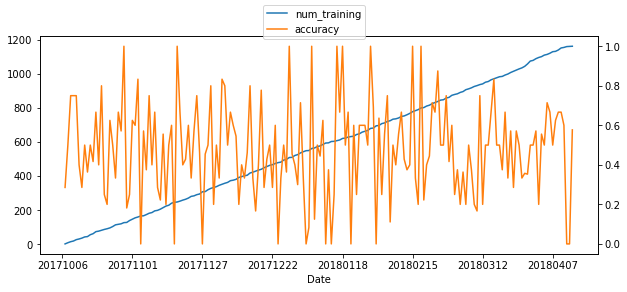

In [34]:
# Great! We've productionize this code a bit, or at least simulate a production deployment
# Let's do a bit of analysis to see how our model performs - as a daily average - throughout
# the time period of observations
daily_models_df[["num_training","accuracy"]].plot(secondary_y="accuracy", xlabel="Date", legend=False, figsize=(10, 4))
plt.gcf().legend(loc='upper center');

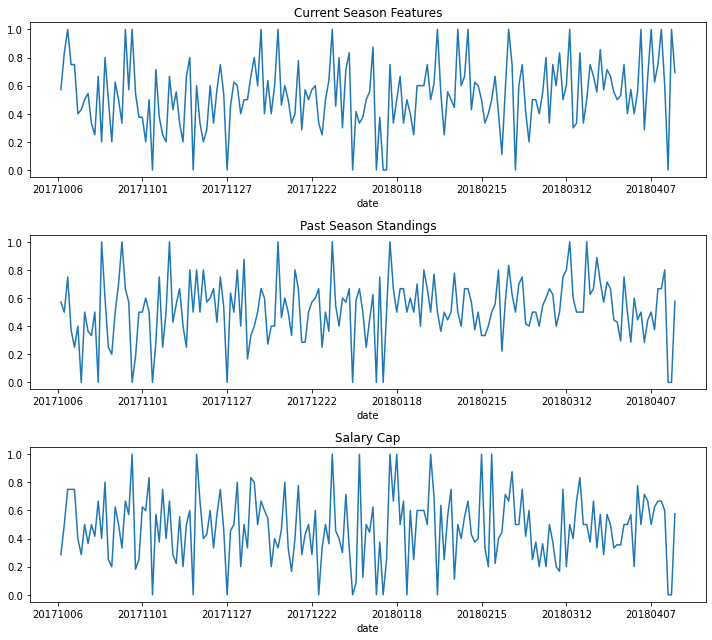

In [35]:
# So this was a bit surprising to me. I thought we would find a regularly increasing model, growing
# in accuracy as the number of training instances do. But while we see a bit of that in the begining,
# it doesn't hold for long and the model seems random throughout the whole date range.

# Generally, we would want to explore the model to understand which features might be performing
# well. The most common approach would be to inspect the coefficients for the regression models being
# produced. But given we have some buckets of features, we could also explore the accuracy as it 
# relates to these buckets. Let's give that a shot.

# First, I'm going to silence a warning coming from sklearn with respect to convergence of our
# logistic regression model. It's important if you are considering using these models, but given the
# number of models we are creating it will add a lot of noise to the output
from warnings import simplefilter
simplefilter(action='ignore')

# Let's build models with just the previously seen performance this season
cur_season_model=pd.DataFrame(observations.groupby("date").apply(model_by_date, ['home_lost', 'home_won', 'away_lost', 'away_won']))

# Now let's build models with just the last season's information in it
past_season_features=set(observations.columns)-set(('home_lost', 'home_won', 'away_lost', 'away_won', 'home_cap', 'away_cap', 'outcome_categorical','date'))
past_season_model=pd.DataFrame(observations.groupby("date").apply(model_by_date, past_season_features))

# Now let's just look at the salary cap information
salary_cap_model=pd.DataFrame(observations.groupby("date").apply(model_by_date, ['home_cap', 'away_cap']))

# Let's plot their accuracies
fig, ax = plt.subplots(3, figsize=(10, 9))

ax[0].set_title("Current Season Features")
cur_season_model["accuracy"].plot(ax=ax[0])
ax[1].set_title("Past Season Standings")
past_season_model["accuracy"].plot(ax=ax[1])
ax[2].set_title("Salary Cap")
salary_cap_model["accuracy"].plot(ax=ax[2])
plt.tight_layout();

In [36]:
# A question that's very hot in the machine learning literature these days
# is the issue of bias in predictive models. Is the model biased when predicting
# the outcomes of one or more groups? Generally, the focus is on societal
# groups where such bias might reinforce inequities where we might not expect
# or desire it. But the issue of bias can be generalized from there, to consider
# the cases where the model performs poorly, and thus shouldn't be used.

In [37]:
# Actually, this dataset is interesting in that regard, one of our teams - 
# the Vegas Golden Knights - has a lot of missing information.
# You'll recall that we imputed this as the average of all of the
# other team's salary cap data. Is that reasonable? More generally, with
# respect to the games the Vegas Golden Knights were playing in, do our predictive
# models have poor accuracy?

def model_by_game(row):
    """Returns the teams involved and the model accuracy for a given entry
    in the observations DataFrame.
    :param row: A single game from the global observations DataFrame
    :param gametime: The time the game is played
    :return: A dict in the form of {"teams":["home team name","away team name"],
                                   "correct_prediciton":True}
    """
    # Let's get all of the data from games before this one. In this case we will assume
    # the game has ended and that we know all of the information from previous
    # games
    training_df=observations[observations.index<row.name]
    features_list=set(training_df.drop(['outcome_categorical','date'], axis='columns').columns)

    # We want to build a model for single games, but we run into a problem like
    # we did with data before. This time it's a bit different, we need to make sure
    # that we see at least two different labels to classify - one where the away team
    # has won and one where the home team has won. Otherwise the classifer doesn't
    # know how to label our data. The approach I'll take here is just to try and
    # classify the data, but if there is an error I'll just send back empty data.
    try:
        # Now, we're specifically interested in the teams which played, but we scrubbed
        # this information from our model! But it turns out we have a mapping between
        # teams and this data, because we've captured the league ranking from last year,
        # and that value is going to be an np.nan for the Golden Knights. Before we impute
        # it, let's make sure we are going to send back these team identifiers       
        retvals=[{"team":str(row["home_last_season_leagueRank"])},{"team":str(row["away_last_season_leagueRank"])}]

        # Let's build our model as before, first cleaning up the missing values
        training_df=training_df.fillna(training_df.mean())
        testing_df=row.fillna(training_df.mean())

        # Now train a model
        from sklearn.linear_model import LogisticRegression
        features=training_df[features_list]
        target=training_df['outcome_categorical']
        clf=LogisticRegression()
        reg=clf.fit(features,target)

        # And now lets evaluate its accuracy
        from sklearn.metrics import accuracy_score
        labels=testing_df['outcome_categorical']
        predictions=reg.predict((testing_df[features_list].values,))

        # Let's return the accuracy, as well as the team names
        retvals[0]["correct_prediction"]=(labels==predictions[0])
        retvals[1]["correct_prediction"]=(labels==predictions[0])
        return pd.DataFrame(retvals)
    except:
        # An error of some kind, likely that the classifier hasn't seen enough data to run
        return pd.DataFrame([{"team":None, "correct_prediction":None},{"team":None, "correct_prediction":None}])

model_results=observations.apply(model_by_game, axis="columns")

# And this will be a series of nested results, so let's just collapse that to a
# single dataframe
df=pd.DataFrame()
for i in range(len(model_results)):
    df=df.append(model_results.iloc[i])
df.head()

,team,correct_prediction
0,None,None
1,None,None
0,2,False
1,10,False
0,8,False


In [38]:
# All right, now that we have a dataframe which has our teams and whether they
# have had a correct prediction or not, we can group by the team identifier and
# apply an aggregation function to determine how many times the model was correct
# for that given team. We can use the numpy count_nonzero function to do this,
# as a true value is represented by a 1 in numpy, while a false value is represented
# with a zero
df.groupby("team").agg({"correct_prediction":np.count_nonzero}).sort_values("correct_prediction")

,correct_prediction
team,
12,29
30,29
5,33
25,33
20,33
1,34
28,34
6,35
14,35


In [39]:
# Ok! So we see that this model has some bias when making predictions, in particular it
# is a poor predictor for matches where team 12 and 30 are in, and it's a better
# predictor for games where team 19 and 9 are involved. Our np.nan which are the Vegas 
# Golden Knights, and is a pretty chance predictor. None of these are amazing values,
# as we know, given that our model isn't so great, but this is one way to see if that
# bias is well spread throughout the model. Keep in mind, each team plays roughly 84
# games in this dataset.

# So this of course begs the question, who is team 12 and 30, whom the model is most biased
# against when it comes to accurate predictions? Let's look.
pd.read_csv("assets/previous_season_standings.csv").query('(leagueRank==12) or (leagueRank==30)')["team.name"]

9        Ottawa Senators
22    Colorado Avalanche
Name: team.name, dtype: object

In [40]:
pd.read_csv("assets/previous_season_standings.csv")["team.name"]

0       Washington Capitals
1       Pittsburgh Penguins
2     Columbus Blue Jackets
3          New York Rangers
4        New York Islanders
5       Philadelphia Flyers
6       Carolina Hurricanes
7         New Jersey Devils
8        Montréal Canadiens
9           Ottawa Senators
10            Boston Bruins
11      Toronto Maple Leafs
12      Tampa Bay Lightning
13         Florida Panthers
14        Detroit Red Wings
15           Buffalo Sabres
16       Chicago Blackhawks
17           Minnesota Wild
18          St. Louis Blues
19      Nashville Predators
20            Winnipeg Jets
21             Dallas Stars
22       Colorado Avalanche
23            Anaheim Ducks
24          Edmonton Oilers
25          San Jose Sharks
26           Calgary Flames
27        Los Angeles Kings
28          Arizona Coyotes
29        Vancouver Canucks
Name: team.name, dtype: object

In [21]:
df = df[df.team != 'nan']
df

,team,correct_prediction
0,None,None
1,None,None
0,2.0,False
1,10.0,False
0,8.0,False
...,...,...
0,15.0,True
0,8.0,False
1,29.0,False
0,22.0,False


In [25]:
df1= df.groupby("team").agg({"correct_prediction":np.count_nonzero}).sort_values("correct_prediction").reset_index()

In [42]:
df1.correct_prediction.sum()

1172

In [43]:
30*82

2460

In [44]:
1172/2460

0.4764227642276423